In [1]:
import matplotlib.pyplot as plt
import numpy as np

from testbed.models.treeffuser import Treeffuser

from numpy.random import PCG64
from _branching_mixture import CustomRandomGenerator, branching_mixture_density

In [2]:
rng = CustomRandomGenerator(PCG64(seed=0))

n = 10**4
scale = 0.05
x, y = rng.branching_mixture(scale=scale, size=n)

# model = tf.LightGBMTreeffuser(sde_initialize_with_data=True)
model = Treeffuser()
fit = model.fit(X=x.reshape(-1, 1), y=y.reshape(-1, 1))

## Figure 1

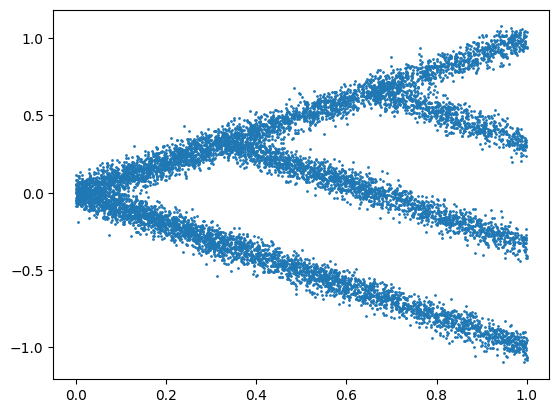

In [3]:
plt.scatter(x, y, s=1)

## Figure 2

100%|██████████| 1000/1000 [00:01<00:00, 520.86it/s]


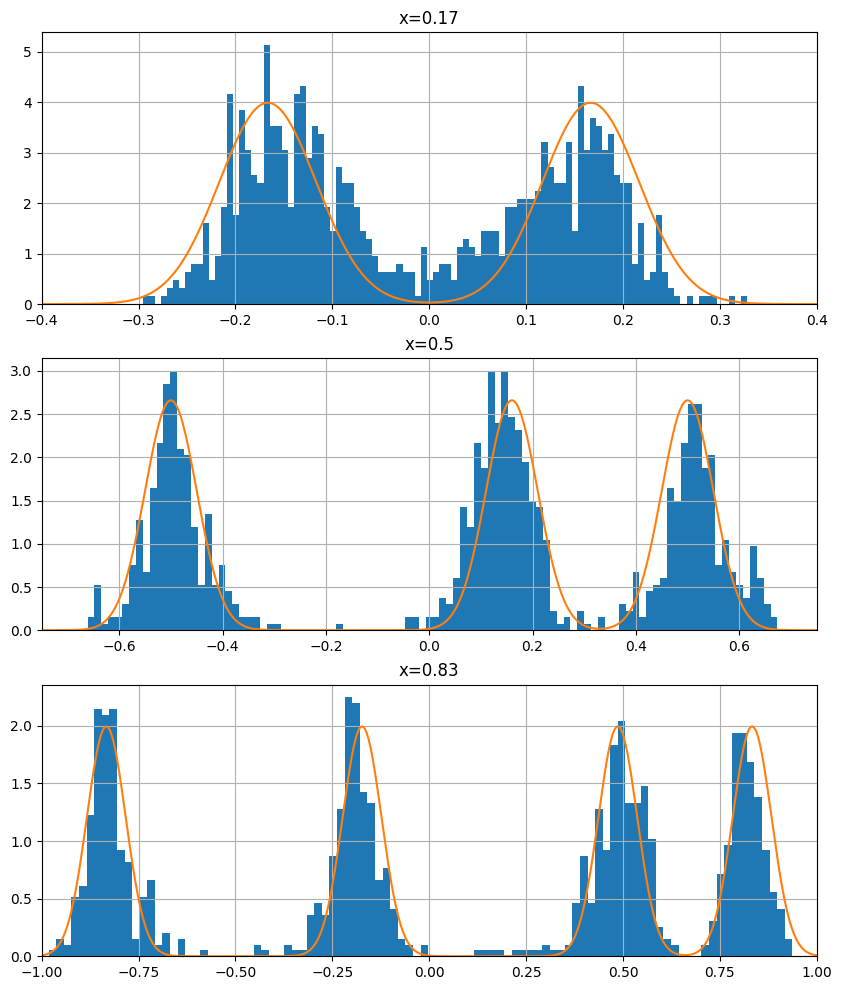

In [4]:
X = (np.array([1, 3, 5]) / 6).reshape(-1, 1)
bandwidhts = [0.1, 0.09, 0.045]
y_lims = [(-0.4, 0.4), (-0.75, 0.75), (-1, 1)]

fig, axs = plt.subplots(3, 1, figsize=(10, 12))
for i, bw in enumerate(bandwidhts):
    y_plot = np.linspace(y_lims[i][0], y_lims[i][1], 1000).reshape(-1, 1)

    y_samples = model.sample(X[i].reshape(1, 1), n_samples=10**3)
    axs[i].hist(y_samples.reshape(-1), bins=100, density=True)

    density_true = branching_mixture_density(X[i], scale=scale)
    density_true = density_true(y_plot)
    axs[i].plot(y_plot, density_true, label="true")

    # plt.legend()
    axs[i].set_xlim(y_lims[i][0], y_lims[i][1])
    axs[i].set_title(f"x={np.round(X[i], 2).item()}")
    axs[i].grid()